# Plotting options

`Clustergram` offers two types of plots - static and interactive. Static plots are using [`matplotlib`](https://matplotlib.org), while interactive are based on [`bokeh`](https://docs.bokeh.org/en/latest/). 

## Backends

Let's load the data and fit clustergram on Palmer penguins dataset. See the [Introduction](introduction) for its overview.

In [1]:
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram

df = seaborn.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

cgram = Clustergram(range(1, 12), n_init=10, verbose=False)
cgram.fit(data)

### Static plots

Static plots can be generated using `Clustergram.plot()` method.

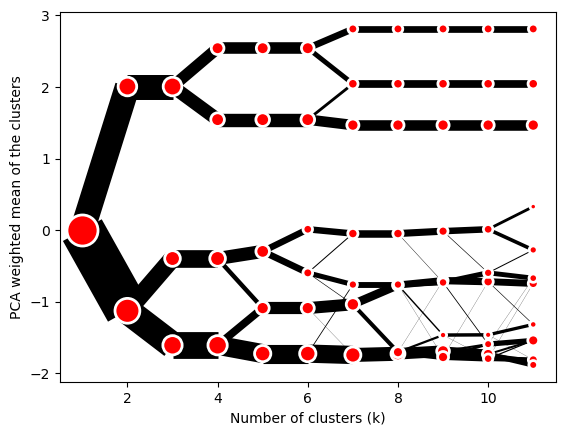

In [2]:
cgram.plot();

#### Styling

`Clustergram.plot()` returns matplotlib axis and can be fully customised as any other matplotlib plot. You can pass keyword arguments to control the style of cluster centers as a `cluster_style` dictionary and arguments to control lines using `line_style` dictionary. Using global styles like those in `seaborn` also works.

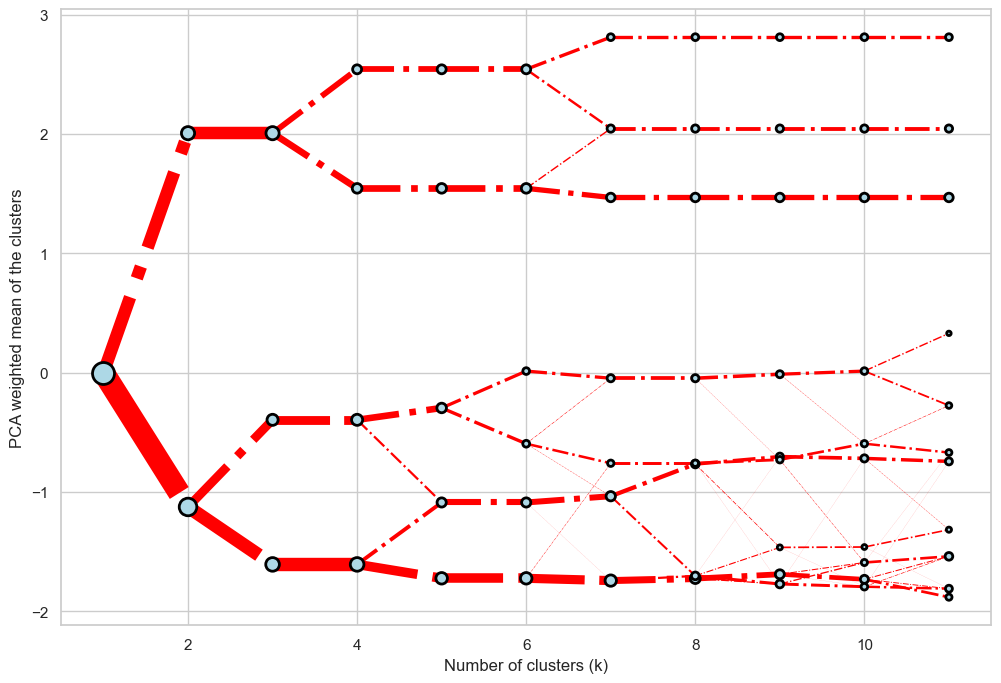

In [3]:
seaborn.set(style='whitegrid')

cgram.plot(
    size=0.5,
    linewidth=0.5,
    cluster_style={"color": "lightblue", "edgecolor": "black"},
    line_style={"color": "red", "linestyle": "-."},
    figsize=(12, 8)
);

#### Partial plot

`Clustergram.plot()` can also plot only a part of the diagram, if you want to focus on a limited range of `k`.

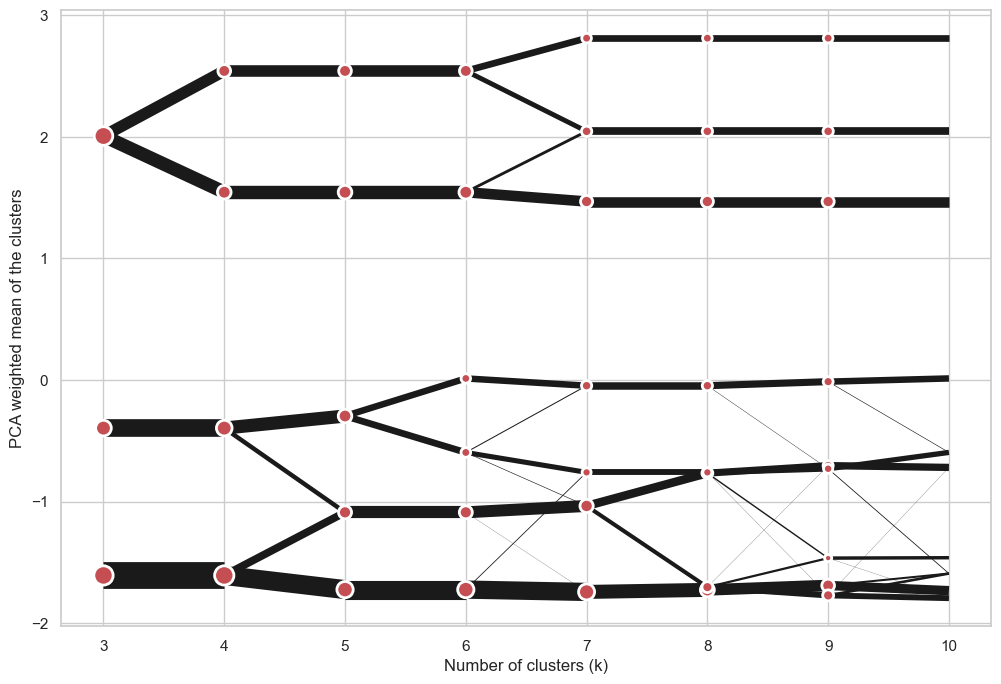

In [4]:
cgram.plot(k_range=range(3, 10), figsize=(12, 8));

#### Saving plot
`Clustergram.plot()` returns matplotlib axis object and as such can be saved as any other plot:

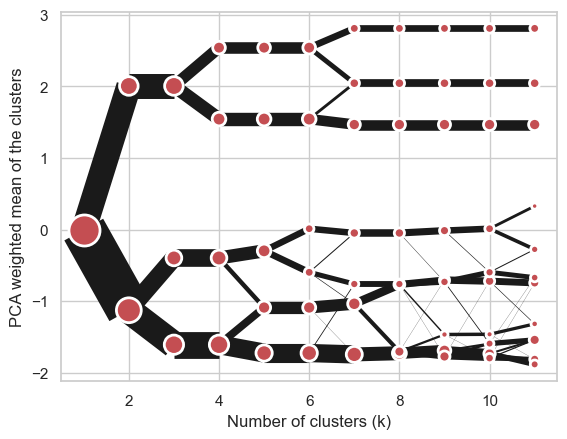

In [5]:
import matplotlib.pyplot as plt

cgram.plot()
plt.savefig('clustergram.svg')

### Interactive plots

Interactive plots can be generated using `Clustergram.bokeh()` method. The method returs bokeh Figure object and it is up to you what to do with it. Probably the best option, if you are using Jupyter notebook, is to show it directly in the cell. For that you will need to load BokehJS interface using `output_notebook()` and then call `show()`.

You need to install `bokeh`, which is an optional dependency only:

```shell
conda install bokeh
```

Or

```shell
pip install bokeh
```

In [6]:
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [7]:
fig = cgram.bokeh()
show(fig)

This clustegram allows you to interactively zoom to specific parts of the diagram and also shows the number of observations per each cluster alongside its label. You can retrieve labels for each observation and each iteration using `Clustergram.labels`.

#### Styling
Bokeh plot can be customised in a very similar way as the static one, using style dictionaries.

In [8]:
fig = cgram.bokeh(
    size=0.5,
    line_width=0.5,
    cluster_style={"color": "lightblue", "line_color": "black", },
    line_style={"color": "red", "line_dash": "dotted", "line_cap": "butt"},
    figsize=(700, 500)
)
show(fig)

#### Saving
You can also save Bokeh plot as HTML to retain its interactivity using `save()` instead of `show()`.

In [9]:
from bokeh.plotting import output_file, save

output_file("clustergram.html")
save(fig)

'/Users/martin/Git/clustergram/doc/notebooks/clustergram.html'

## Mean options

On the `y` axis, a clustergram can use mean values as in the original paper by Matthias Schonlau or PCA weighted mean values as in the implementation by Tal Galili. PCA weighted plots are default as they help distinguishing between different branches and make interpretation a bit easier. The same option is supported by both plotting backends.

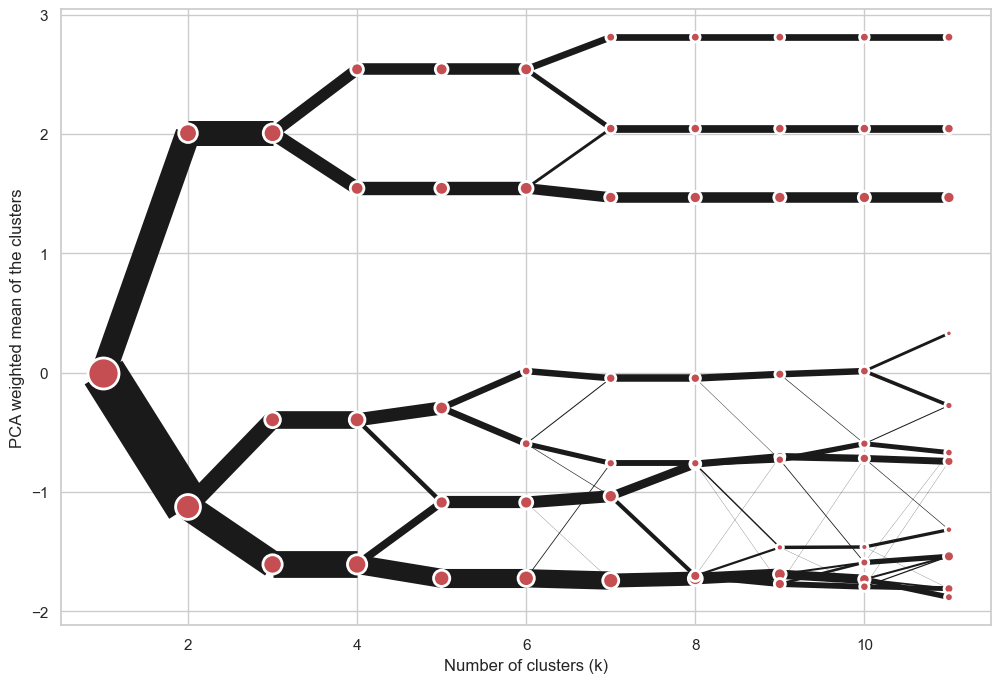

In [10]:
cgram.plot(figsize=(12, 8), pca_weighted=True);

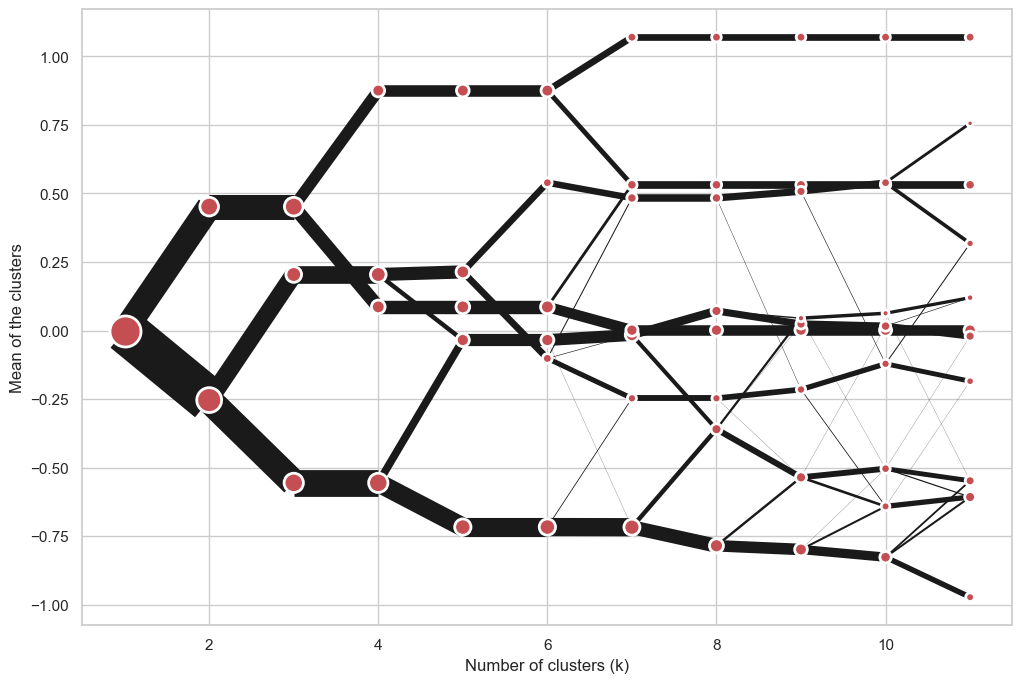

In [11]:
cgram.plot(figsize=(12, 8), pca_weighted=False);

By default, PCA-weighted clustergrams are weighted using the first principal component but nothing stops you from using any other.

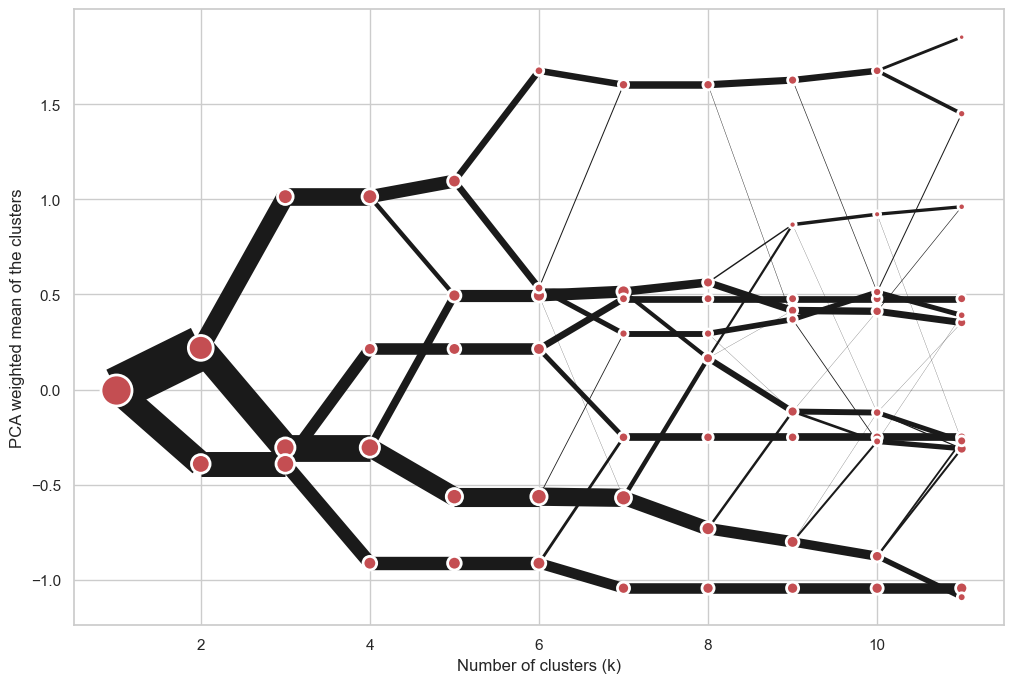

In [12]:
cgram.plot(figsize=(12, 8), pca_weighted=True, pca_component=2);